## Combine weights, biases of three models into 1 pkl file

In [2]:
import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from keras.regularizers import l2, l1
import pickle as pkl
import os,sys,csv,re

from tqdm import tqdm_notebook as tqdm
import pylab as pl
import numpy as np

# from keras.callbacks import EarlyStopping
# from keras.layers import Dense, Input, Flatten
# from keras.models import Sequential, load_model
# from keras.regularizers import l2, l1
from sklearn_extra.cluster import KMedoids

In [3]:
import umap
import umap.plot

In [4]:
latent = np.load("/home/bram/lindel423/vae697/VanillaVAE/latent_features_test_beta1.0_h_dim[2091, 1394].npy")
latent_fc = np.load("/home/bram/lindel423/vae697/VanillaVAE/latent_features_fc_beta1.0_h_dim[2091, 1394].npy")

pca_697 = np.load("/home/bram/lindel423/data/pca/fc_697.npy")

In [5]:
kmedoids = KMedoids(n_clusters=2, random_state=42).fit(latent)

In [6]:
kmedoids.labels_

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

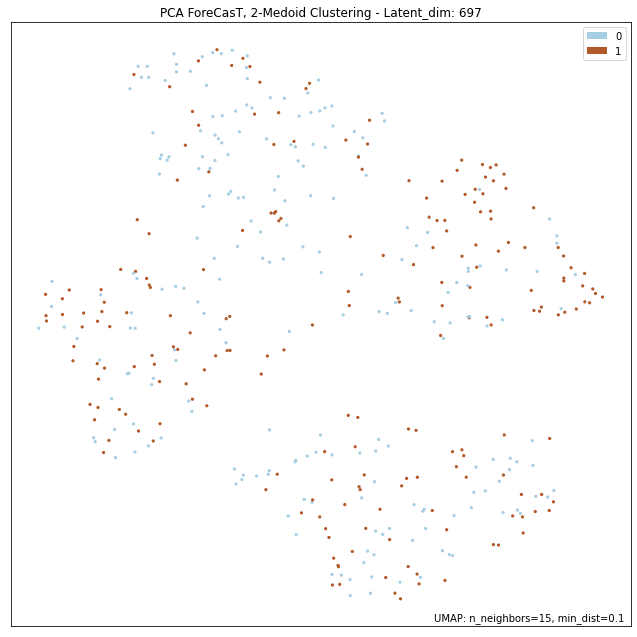

In [7]:
mapper = umap.UMAP(
                n_neighbors=15,
                min_dist=0.1,
                n_components=2,
                metric='euclidean'
            ).fit(pca_697)  # CHANGE THIS every time

# y = np.load(config['exp_params']['data_path'] + config['exp_params']['data_path'].split("/")[-2] + "_train.npy")
# y = np.load(config['exp_params']['data_path'] + "types_test.npy")
p = umap.plot.points(mapper, labels=kmedoids.labels_, color_key_cmap="Paired", background="white")
umap.plot.plt.title("PCA ForeCasT, 2-Medoid Clustering - Latent_dim: 697")
# umap.plot.plt.show()
umap.plot.plt.savefig("/home/bram/lindel423/pca/umap_2medoid_fc.png", dpi=800)
